In [117]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 

sns.set_theme()

In [118]:
df= pd.read_csv("daily-min-temperatures.csv",parse_dates=[0],index_col=0)

In [119]:
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


<Axes: xlabel='Date'>

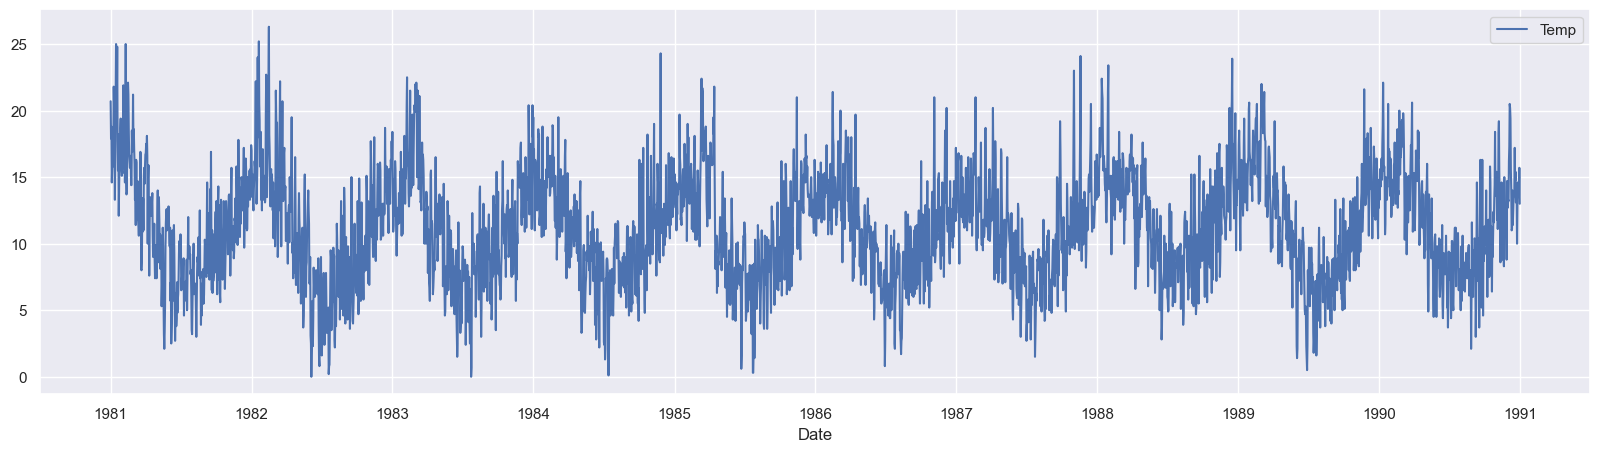

In [120]:
plt.figure(figsize=(20,5))
sns.lineplot(df)

In [121]:
l=[]
l.append(np.mean(df["Temp"].loc["1981"]))

In [122]:
l.append(np.mean(df["Temp"].loc["1990"]))

<Axes: >

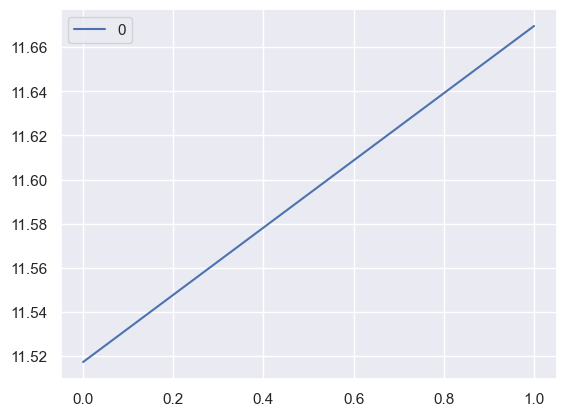

In [123]:
meandf= pd.DataFrame(l)
sns.lineplot(meandf)

In [124]:
from statsmodels.tsa.stattools import kpss


def kenpss(x):
    kpss_stat,pval,lag,crit= kpss(x)
    print("kpss_stat: ",kpss_stat)
    print("pval: ", pval)
    print("lag: ",lag)
    print("Critical values: ", crit)
    if(pval<0.05):
        print("The model is not stationary")
    else:
        print("the model is stationary")

print(kenpss(df["Temp"]))

kpss_stat:  0.05570612670427435
pval:  0.1
lag:  36
Critical values:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
the model is stationary
None


C:\Users\Admin\AppData\Local\Temp\ipykernel_4764\1896373521.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat,pval,lag,crit= kpss(x)


In [125]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition= seasonal_decompose(x=df,model="additive",period=1825)
trend= decomposition.trend
seasonal= decomposition.seasonal
resdual= decomposition.resid

[]

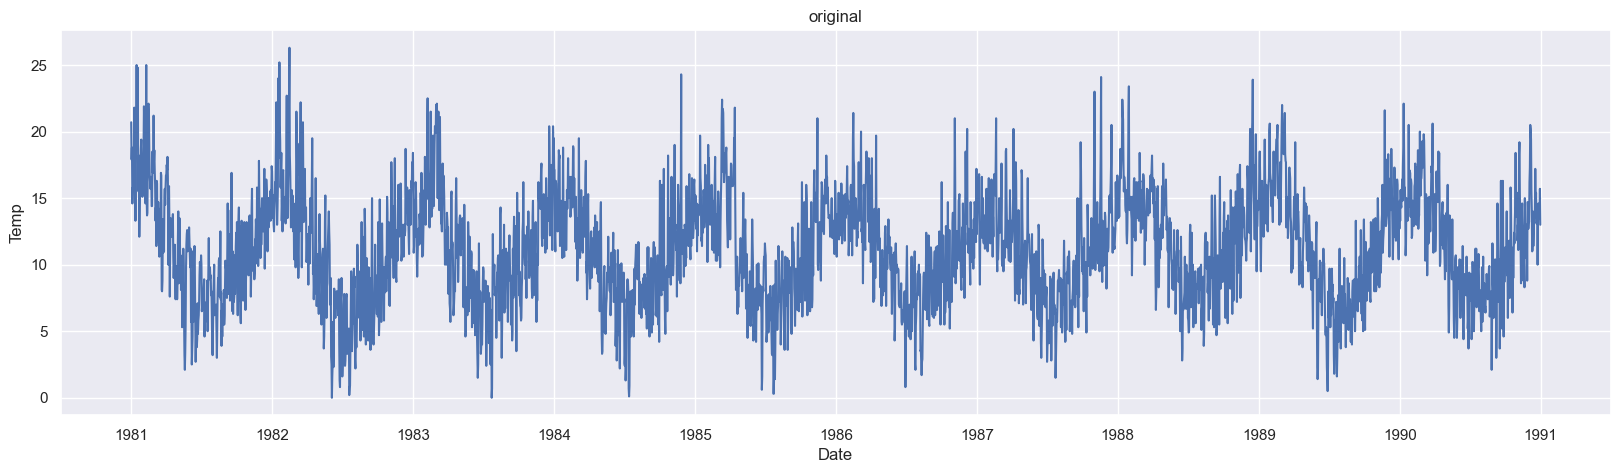

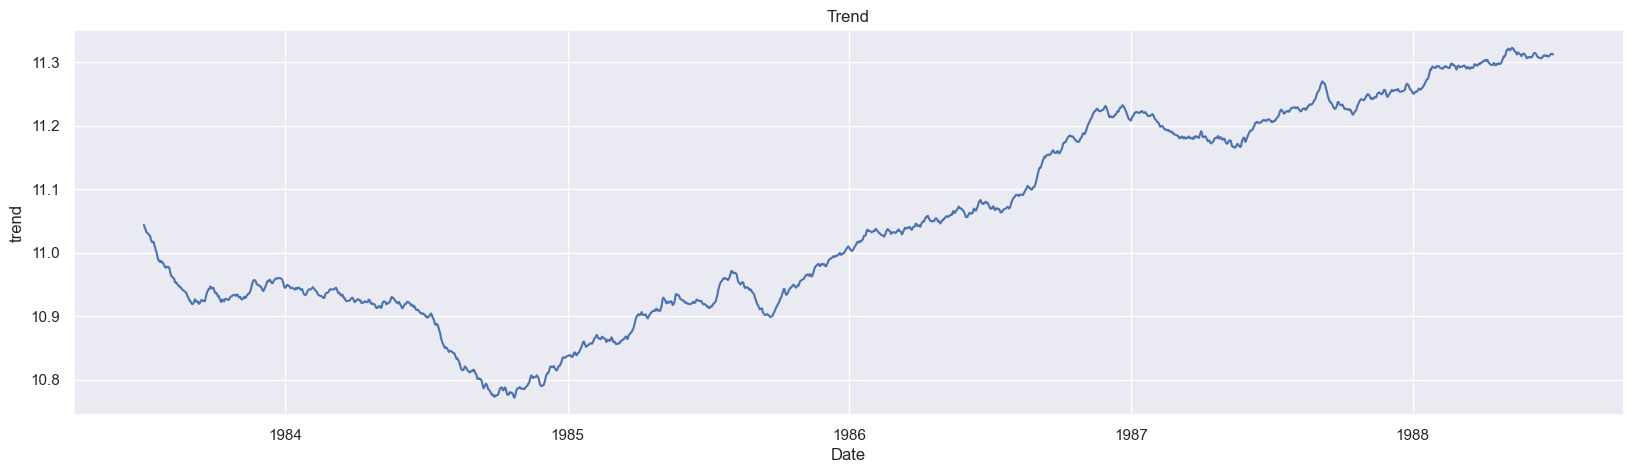

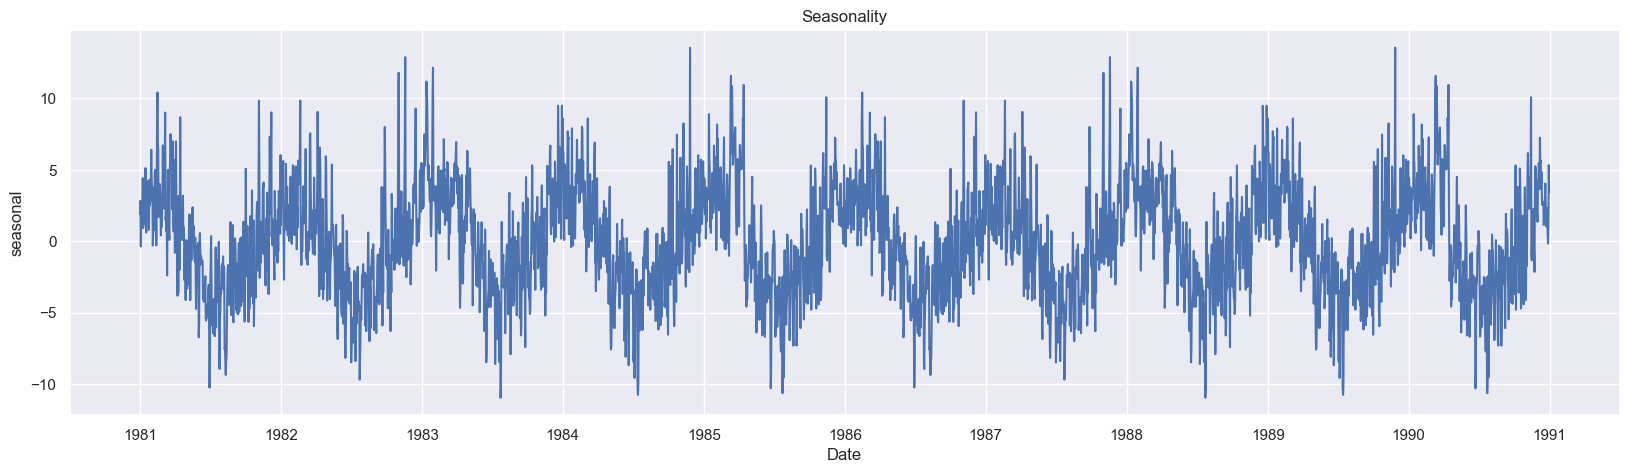

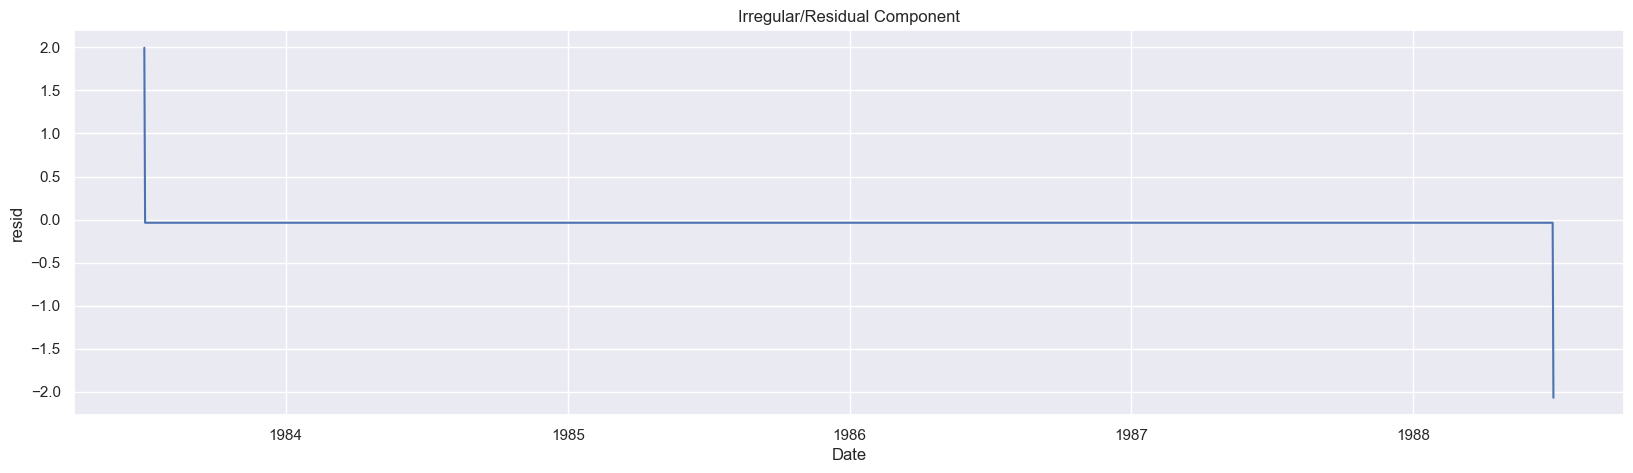

In [126]:
plt.figure(figsize=(20,5))
sns.lineplot(df,x=df.index,y=df["Temp"])
plt.title("original")
plt.plot()

plt.figure(figsize=(20,5))
sns.lineplot(df,x=df.index,y=trend)
plt.title("Trend")
plt.plot()

plt.figure(figsize=(20,5))
sns.lineplot(df,x=df.index,y=seasonal)
plt.title("Seasonality")
plt.plot()

plt.figure(figsize=(20,5))
sns.lineplot(df,x=df.index,y=resdual)
plt.title("Irregular/Residual Component")
plt.plot()

In [127]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition= seasonal_decompose(x=df,model="additive",period=500)
trend= decomposition.trend
seasonal= decomposition.seasonal
resdual= decomposition.resid
sns.set_color_codes("muted")

[]

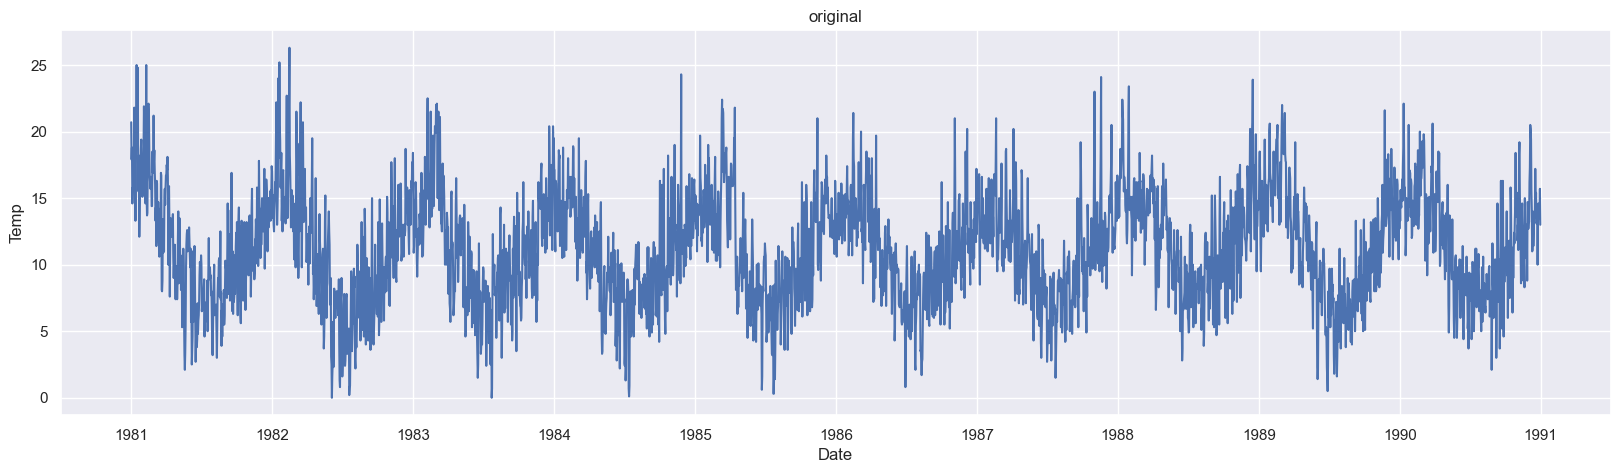

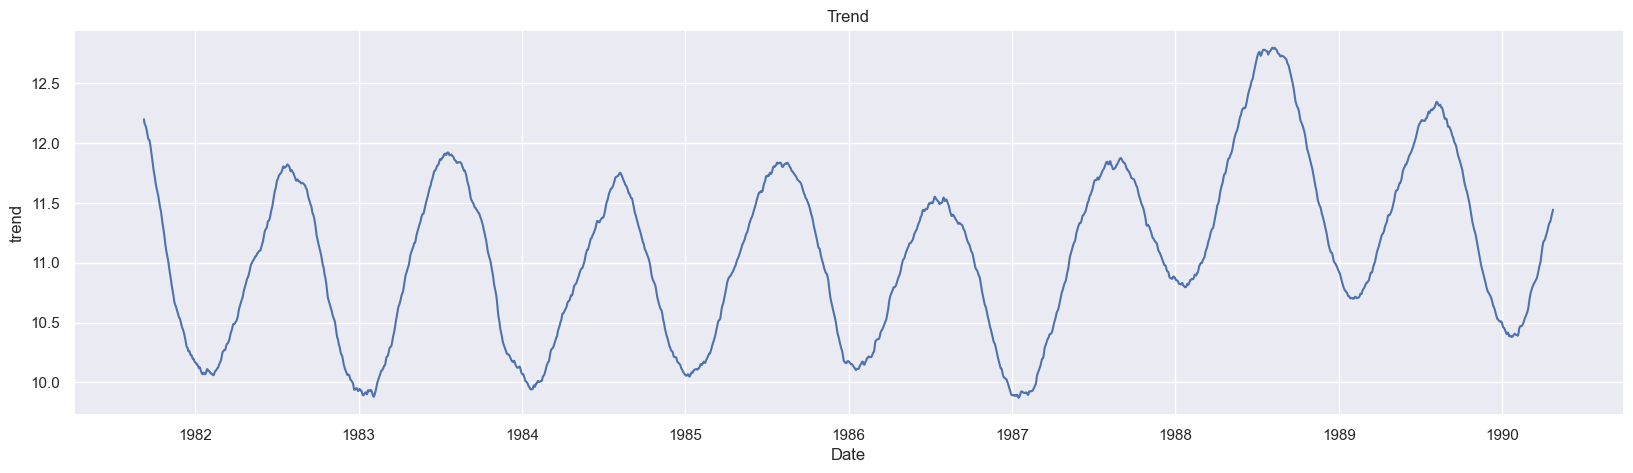

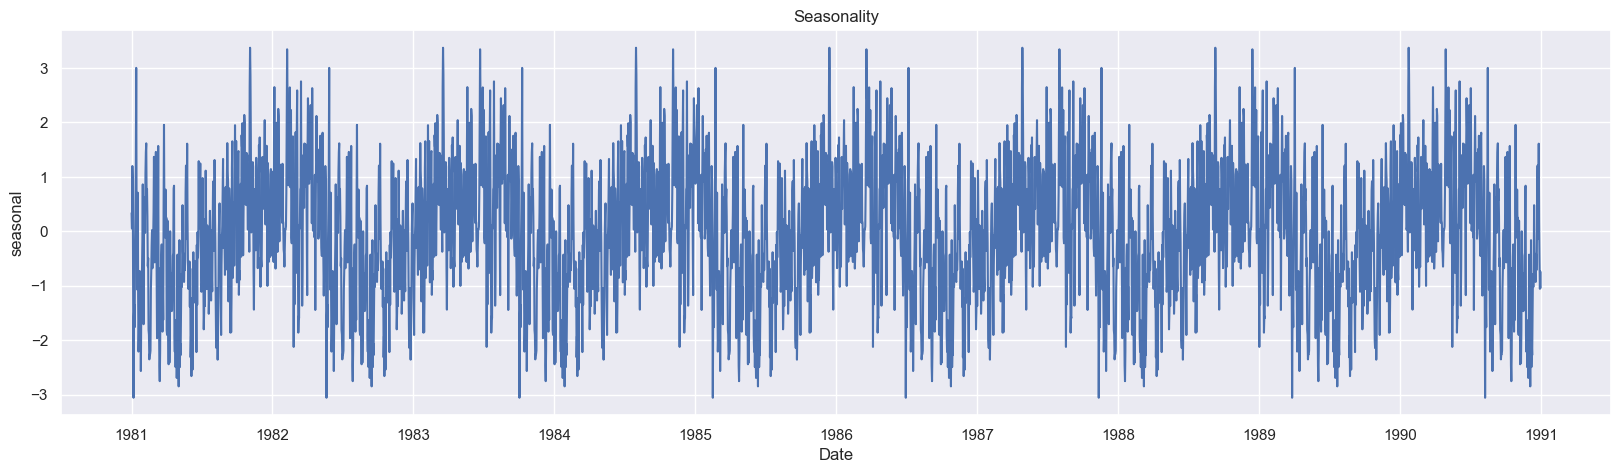

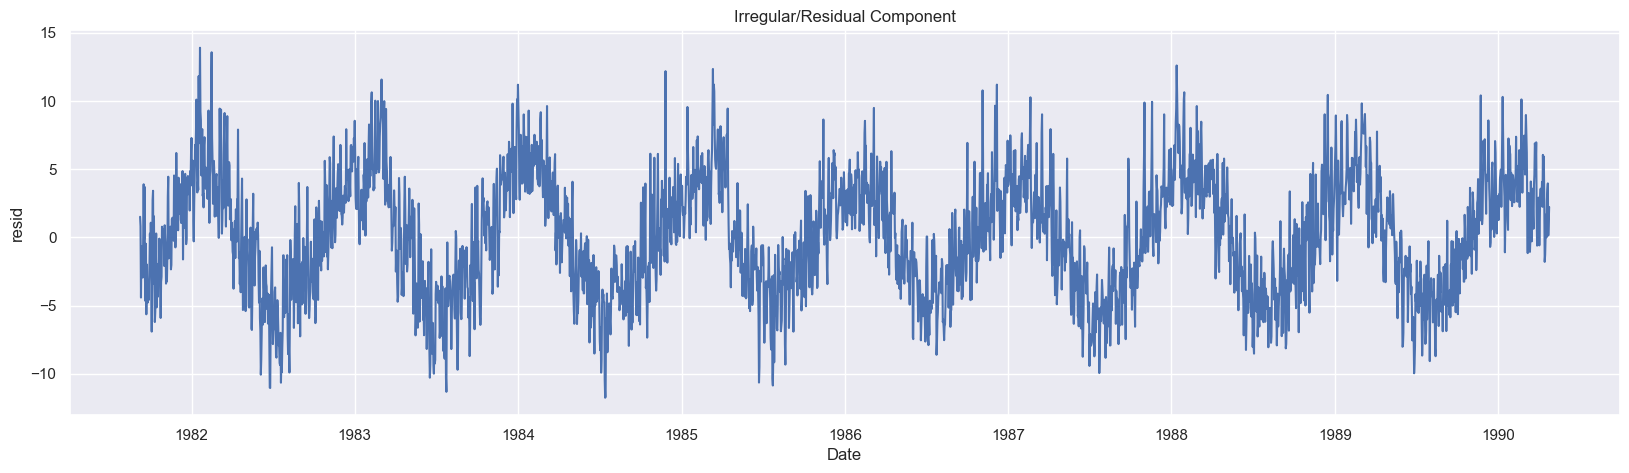

In [128]:
plt.figure(figsize=(20,5))
sns.lineplot(df,x=df.index,y=df["Temp"])
plt.title("original")
plt.plot()

plt.figure(figsize=(20,5))
sns.lineplot(df,x=df.index,y=trend)
plt.title("Trend")
plt.plot()

plt.figure(figsize=(20,5))
sns.lineplot(df,x=df.index,y=seasonal)
plt.title("Seasonality")
plt.plot()

plt.figure(figsize=(20,5))
sns.lineplot(df,x=df.index,y=resdual)
plt.title("Irregular/Residual Component")
plt.plot()